In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
from sklearn.datasets import load_diabetes
diabetes = load_diabetes()


#Convert data to pandas dataframe

my_df = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)


#add the target

my_df["target"] = diabetes.target
my_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641,135.0


In [3]:
#Split the data into X and y
X = my_df.drop("target", axis=1)
y = my_df["target"]
X.shape, y.shape



((442, 10), (442,))

In [4]:
from sklearn.model_selection import train_test_split

# Split data iinto training and testing

X_train, X_val, y_train, y_val = train_test_split(X, y , test_size= 0.2, random_state=42)

# print out the shape of the training and testing sets

print("Training set shape: ",X_train.shape, y_train.shape )
print("Test set shape: ", X_val.shape,y_val.shape )

#80% to training and 20% to testing

Training set shape:  (353, 10) (353,)
Test set shape:  (89, 10) (89,)


In [5]:
from sklearn.linear_model import LinearRegression

# create a linear regression model

lr = LinearRegression()


In [6]:
# Traing the model on the training set

lr.fit(X_train, y_train)


LinearRegression()

In [7]:
#Predict on the testing set
# y_pred are predicted values based on features
# Once we have these preds, we can compare them to the 
# actual values of the target
# to evaluate the performace of the model.
y_pred =  lr.predict(X_val)
y_pred.shape

(89,)

In [8]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
#Evaluate perfomance of the model

r2 =r2_score(y_val, y_pred) 
#R2: # variance of the dependent variable (target) explained by independent variables(features)
# How well the model fits the data. Higher is better

mse= mean_squared_error(y_val, y_pred)
# MSE: average squared distance between predicted and actual values: Lower is better

mae=mean_absolute_error(y_val,y_pred)
#MAE: Average absolute distance  between predicted and actual values. Lower is better

intercept = lr.intercept_
#Intercept: Starting point of the regression line on the y_axis
#if possitive number. target increases as features increase, if negative => opposite
print("R2 sore: ", r2)
print("MSE: ", mse)
print("MAE: ", mae)
print("Intercept: ", intercept )

R2 sore:  0.4526066021617381
MSE:  2900.1732878832313
MAE:  42.79389304196525
Intercept:  151.3456553477407


Text(0.5, 1.0, 'Predicted vs actual values')

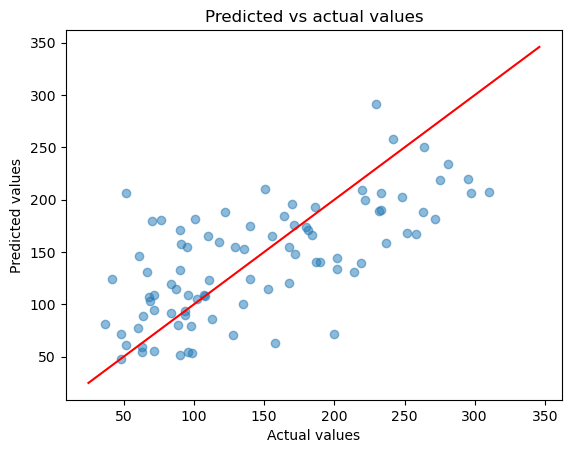

In [9]:
import matplotlib.pyplot as plt

# Plot the predicted vs actual values
# Predicted values of the target variables are plotted on hte x-axis
# Actual values of the target variable are plotted on the y-axis

plt.scatter(y_val, y_pred, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red")
plt.xlabel("Actual values")
plt.ylabel("Predicted values")
plt.title("Predicted vs actual values")
